In [297]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
#Avisos
import warnings
warnings.filterwarnings('ignore')

In [298]:
df=pd.read_csv("/content/Dados Históricos - Ibovespa_1ano(diario).csv", sep=",")
df.head(25)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,18.08.2023,115.409,114.973,115.729,114.423,"10,60M","0,37%"
1,17.08.2023,114.982,115.592,116.610,114.859,"12,75M","-0,53%"
2,16.08.2023,115.592,116.171,117.338,115.534,"18,86M","-0,50%"
3,15.08.2023,116.171,116.809,117.697,116.033,"14,64M","-0,55%"
4,14.08.2023,116.810,118.067,118.082,116.530,"11,20M","-1,06%"
5,11.08.2023,118.065,118.350,119.054,117.415,"11,87M","-0,24%"
6,10.08.2023,118.350,118.412,119.438,118.113,"12,69M","-0,05%"
7,09.08.2023,118.409,119.090,119.090,117.901,"11,25M","-0,57%"
8,08.08.2023,119.090,119.378,119.553,117.492,"10,25M","-0,24%"
9,07.08.2023,119.380,119.509,120.104,118.894,"8,73M","-0,11%"


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      264 non-null    object 
 1   Último    264 non-null    float64
 2   Abertura  264 non-null    float64
 3   Máxima    264 non-null    float64
 4   Mínima    264 non-null    float64
 5   Vol.      264 non-null    object 
 6   Var%      264 non-null    object 
dtypes: float64(4), object(3)
memory usage: 14.6+ KB


In [300]:
df['Data'] = pd.to_datetime(df['Data'])

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      264 non-null    datetime64[ns]
 1   Último    264 non-null    float64       
 2   Abertura  264 non-null    float64       
 3   Máxima    264 non-null    float64       
 4   Mínima    264 non-null    float64       
 5   Vol.      264 non-null    object        
 6   Var%      264 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 14.6+ KB


In [302]:
df.head(25)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2023-08-18,115.409,114.973,115.729,114.423,"10,60M","0,37%"
1,2023-08-17,114.982,115.592,116.610,114.859,"12,75M","-0,53%"
2,2023-08-16,115.592,116.171,117.338,115.534,"18,86M","-0,50%"
3,2023-08-15,116.171,116.809,117.697,116.033,"14,64M","-0,55%"
4,2023-08-14,116.810,118.067,118.082,116.530,"11,20M","-1,06%"
5,2023-11-08,118.065,118.350,119.054,117.415,"11,87M","-0,24%"
6,2023-10-08,118.350,118.412,119.438,118.113,"12,69M","-0,05%"
7,2023-09-08,118.409,119.090,119.090,117.901,"11,25M","-0,57%"
8,2023-08-08,119.090,119.378,119.553,117.492,"10,25M","-0,24%"
9,2023-07-08,119.380,119.509,120.104,118.894,"8,73M","-0,11%"


In [303]:
def convert_to_float(value):
    return float(value.replace("M", "").replace(",", "."))

df["Vol."] = df["Vol."].apply(convert_to_float)

print(df)

          Data   Último  Abertura   Máxima   Mínima   Vol.    Var%
0   2023-08-18  115.409   114.973  115.729  114.423  10.60   0,37%
1   2023-08-17  114.982   115.592  116.610  114.859  12.75  -0,53%
2   2023-08-16  115.592   116.171  117.338  115.534  18.86  -0,50%
3   2023-08-15  116.171   116.809  117.697  116.033  14.64  -0,55%
4   2023-08-14  116.810   118.067  118.082  116.530  11.20  -1,06%
..         ...      ...       ...      ...      ...    ...     ...
259 2022-05-08  106.472   105.893  107.176  105.518  12.95   0,55%
260 2022-04-08  105.892   103.777  106.162  103.777  15.50   2,04%
261 2022-03-08  103.775   103.362  103.878  102.822  12.38   0,40%
262 2022-02-08  103.362   102.225  103.660  101.694  10.12   1,11%
263 2022-01-08  102.225   103.165  103.317  101.764  11.63  -0,91%

[264 rows x 7 columns]


In [304]:
def convert_to_floats(value):
    return float(value.replace("%", "").replace(",", "."))

df["Var%"] = df["Var%"].apply(convert_to_floats)

print(df)

          Data   Último  Abertura   Máxima   Mínima   Vol.  Var%
0   2023-08-18  115.409   114.973  115.729  114.423  10.60  0.37
1   2023-08-17  114.982   115.592  116.610  114.859  12.75 -0.53
2   2023-08-16  115.592   116.171  117.338  115.534  18.86 -0.50
3   2023-08-15  116.171   116.809  117.697  116.033  14.64 -0.55
4   2023-08-14  116.810   118.067  118.082  116.530  11.20 -1.06
..         ...      ...       ...      ...      ...    ...   ...
259 2022-05-08  106.472   105.893  107.176  105.518  12.95  0.55
260 2022-04-08  105.892   103.777  106.162  103.777  15.50  2.04
261 2022-03-08  103.775   103.362  103.878  102.822  12.38  0.40
262 2022-02-08  103.362   102.225  103.660  101.694  10.12  1.11
263 2022-01-08  102.225   103.165  103.317  101.764  11.63 -0.91

[264 rows x 7 columns]


In [305]:
df = df.rename(columns={"Vol.":"Vol", "Var%":"Var", "Mínima": "Minima", "Máxima": "Maxima", "Último":"Fechamento"})

In [306]:
df.describe()

,Fechamento,Abertura,Maxima,Minima,Vol,Var
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,110.894898,110.850201,111.883201,109.867068,13.366515,0.050833
std,5.554323,5.569331,5.524225,5.552252,3.121339,1.300673
min,97.926000,97.926000,99.258000,96.997000,5.220000,-3.350000
25%,107.224750,107.142500,108.205500,106.219250,11.382500,-0.745000
50%,110.369000,110.287000,111.674500,109.517500,12.995000,0.040000
75%,115.428750,115.377250,116.211250,114.438500,14.962500,0.815000
max,122.560000,122.560000,123.010000,121.370000,26.030000,5.540000


In [307]:
df = df.sort_values(by='Data')

In [308]:
df.head()

,Data,Fechamento,Abertura,Maxima,Minima,Vol,Var
263,2022-01-08,102.225,103.165,103.317,101.764,11.63,-0.91
240,2022-01-09,110.405,109.524,110.405,108.217,14.48,0.81
199,2022-01-11,116.929,116.037,118.261,115.547,17.97,0.77
179,2022-01-12,110.926,112.479,112.479,110.548,15.19,-1.39
262,2022-02-08,103.362,102.225,103.660,101.694,10.12,1.11


In [309]:
df.set_index('Data', inplace=True)

In [310]:
df.head()

,Fechamento,Abertura,Maxima,Minima,Vol,Var
Data,,,,,,
2022-01-08,102.225,103.165,103.317,101.764,11.63,-0.91
2022-01-09,110.405,109.524,110.405,108.217,14.48,0.81
2022-01-11,116.929,116.037,118.261,115.547,17.97,0.77
2022-01-12,110.926,112.479,112.479,110.548,15.19,-1.39
2022-02-08,103.362,102.225,103.660,101.694,10.12,1.11


In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 264 entries, 2022-01-08 to 2023-12-07
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fechamento  264 non-null    float64
 1   Abertura    264 non-null    float64
 2   Maxima      264 non-null    float64
 3   Minima      264 non-null    float64
 4   Vol         264 non-null    float64
 5   Var         264 non-null    float64
dtypes: float64(6)
memory usage: 14.4 KB


In [312]:
df.isnull().sum()

Fechamento    0
Abertura      0
Maxima        0
Minima        0
Vol           0
Var           0
dtype: int64

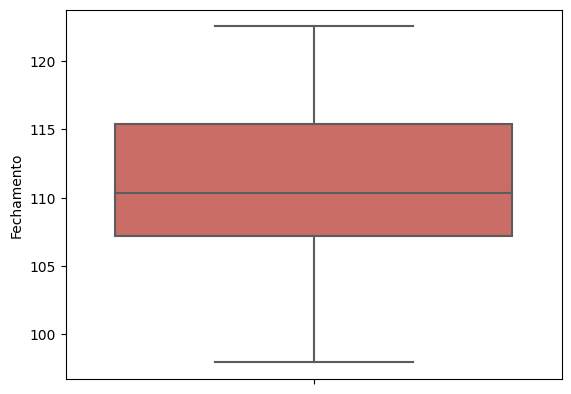

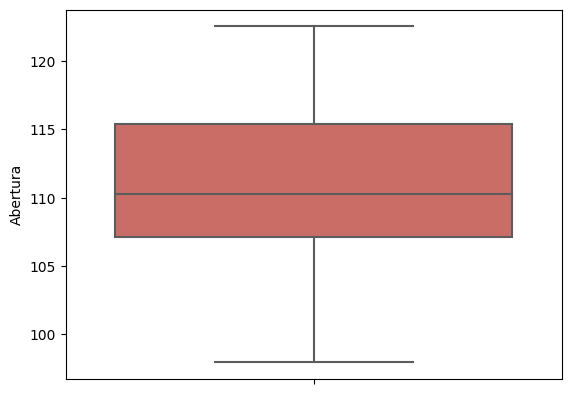

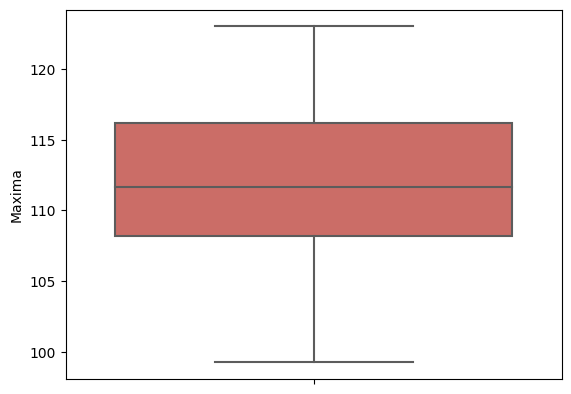

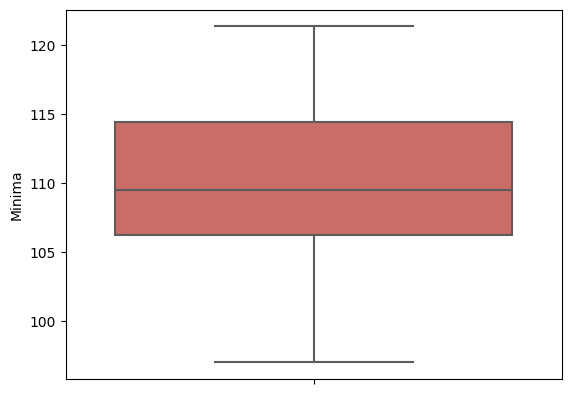

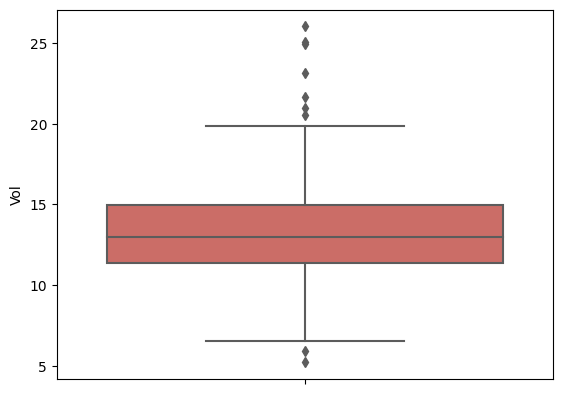

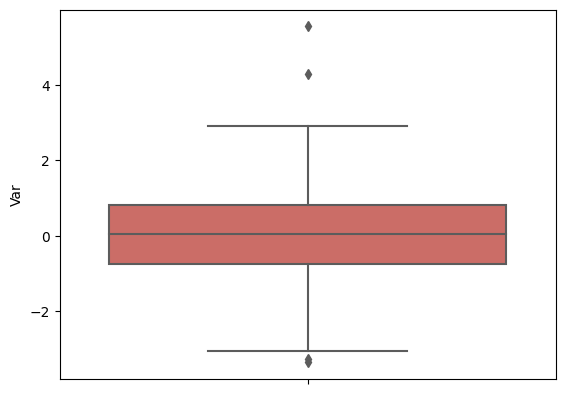

In [313]:
sns.boxplot(y="Fechamento", data=df, palette="hls")
plt.show()
sns.boxplot(y="Abertura", data=df, palette="hls")
plt.show()
sns.boxplot(y="Maxima", data=df, palette="hls")
plt.show()
sns.boxplot(y="Minima", data=df, palette="hls")
plt.show()
sns.boxplot(y="Vol", data=df, palette="hls")
plt.show()
sns.boxplot(y="Var", data=df, palette="hls")
plt.show()

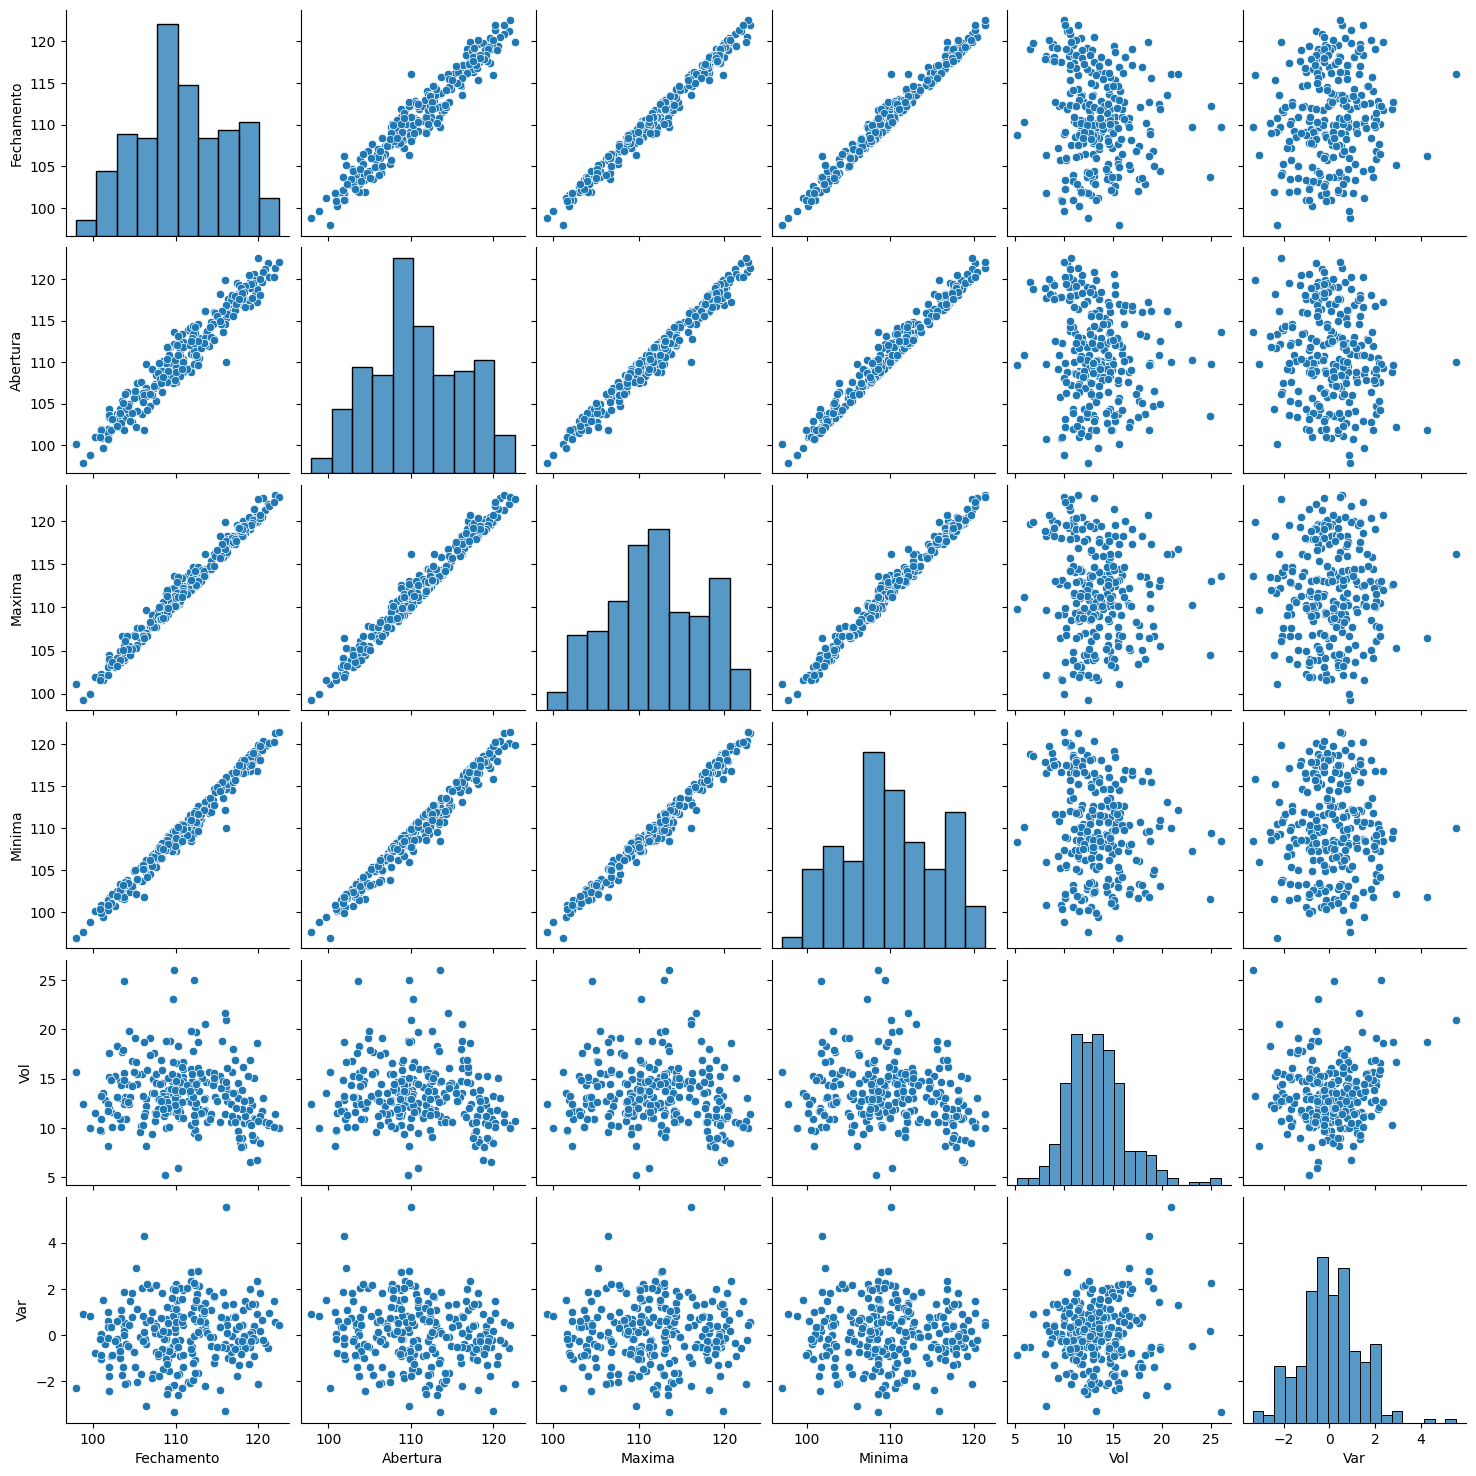

In [314]:
sns.pairplot(df, vars=['Fechamento','Abertura','Maxima','Minima','Vol', "Var"])

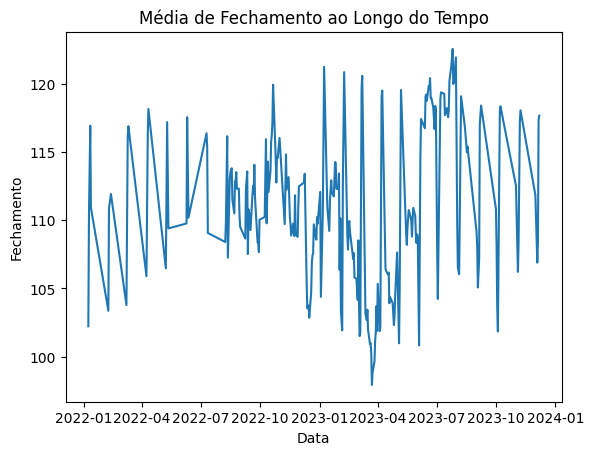

In [315]:
plt.plot(df.index, df["Fechamento"])
plt.xlabel("Data")
plt.ylabel("Fechamento")
plt.title("Média de Fechamento ao Longo do Tempo")
plt.show()

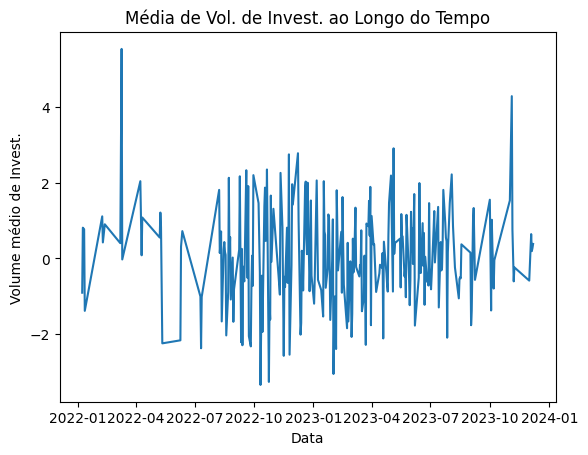

In [316]:
plt.plot(df.index, df["Var"])
plt.xlabel("Data")
plt.ylabel("Volume médio de Invest.")
plt.title("Média de Vol. de Invest. ao Longo do Tempo")
plt.show()

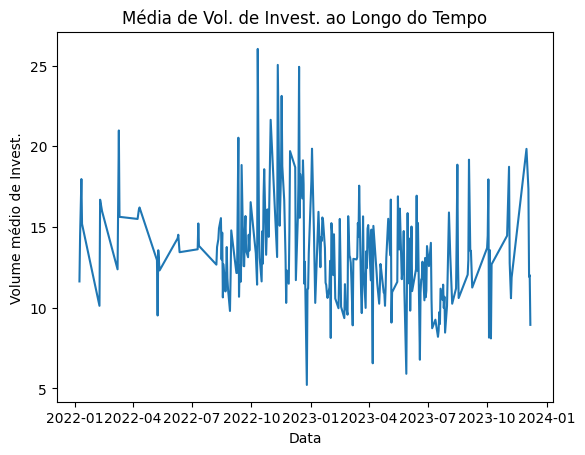

In [317]:
plt.plot(df.index, df["Vol"])
plt.xlabel("Data")
plt.ylabel("Volume médio de Invest.")
plt.title("Média de Vol. de Invest. ao Longo do Tempo")
plt.show()

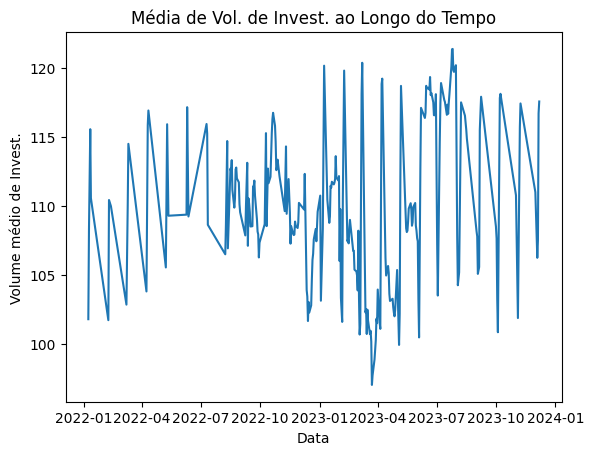

In [318]:
plt.plot(df.index, df["Minima"])
plt.xlabel("Data")
plt.ylabel("Volume médio de Invest.")
plt.title("Média de Vol. de Invest. ao Longo do Tempo")
plt.show()

<Axes: >

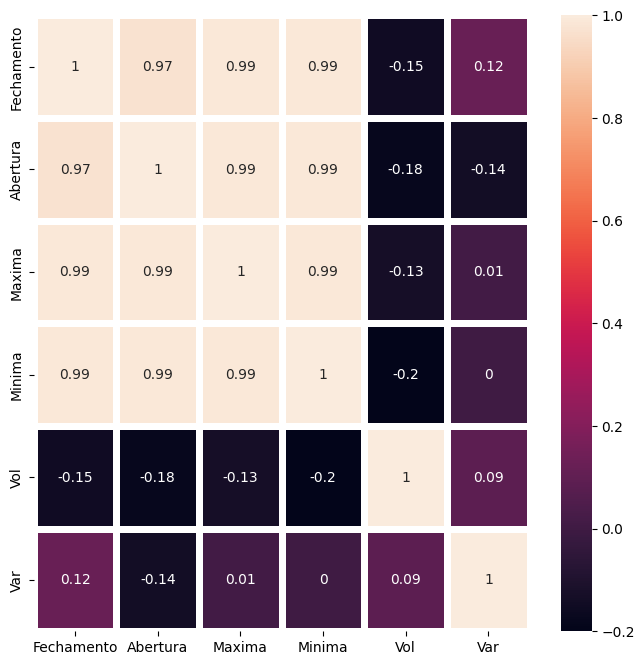

In [319]:
correlation_matriz = df.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data = correlation_matriz, annot=True, linewidths=5, ax=ax)

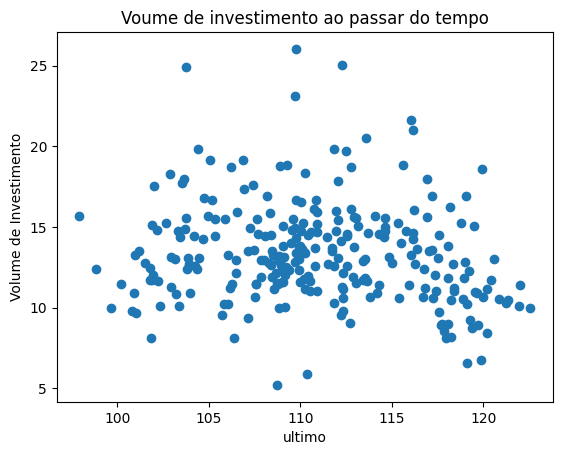

In [320]:
plt.scatter(df["Fechamento"], df["Vol"])
plt.xlabel("ultimo")
plt.ylabel("Volume de Investimento")
plt.title("Voume de investimento ao passar do tempo")
plt.show()

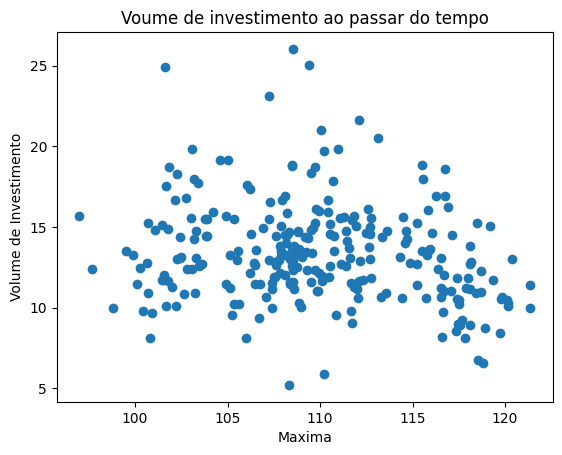

In [321]:
plt.scatter(df["Minima"], df["Vol"])
plt.xlabel("Maxima")
plt.ylabel("Volume de Investimento")
plt.title("Voume de investimento ao passar do tempo")
plt.show()

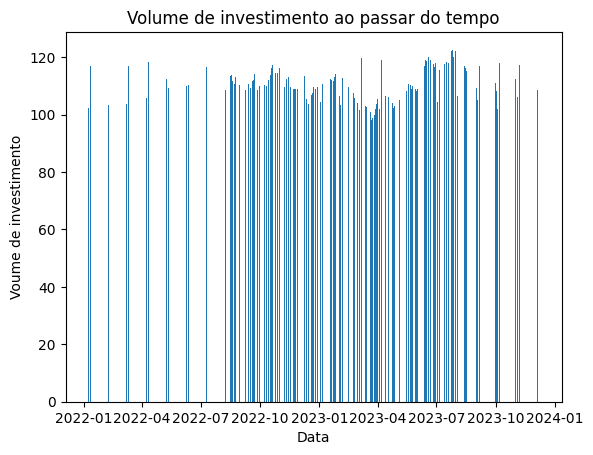

In [322]:
plt.bar(df.index, df["Fechamento"])
plt.xlabel("Data")
plt.ylabel("Voume de investimento")
plt.title("Volume de investimento ao passar do tempo")
plt.show()

In [323]:
print("Data Inicial:", df.index.min())

Data Inicial: 2022-01-08 00:00:00


In [324]:
print("Data Final:", df.index.max())

Data Final: 2023-12-07 00:00:00


In [325]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf

#*Tendência - Direção
#*Sazonalidade - Recorrência das oscilações
#*Resíduo - O que sobra do sinal

In [326]:
dec_Vol = seasonal_decompose(df['Fechamento'], period=7)

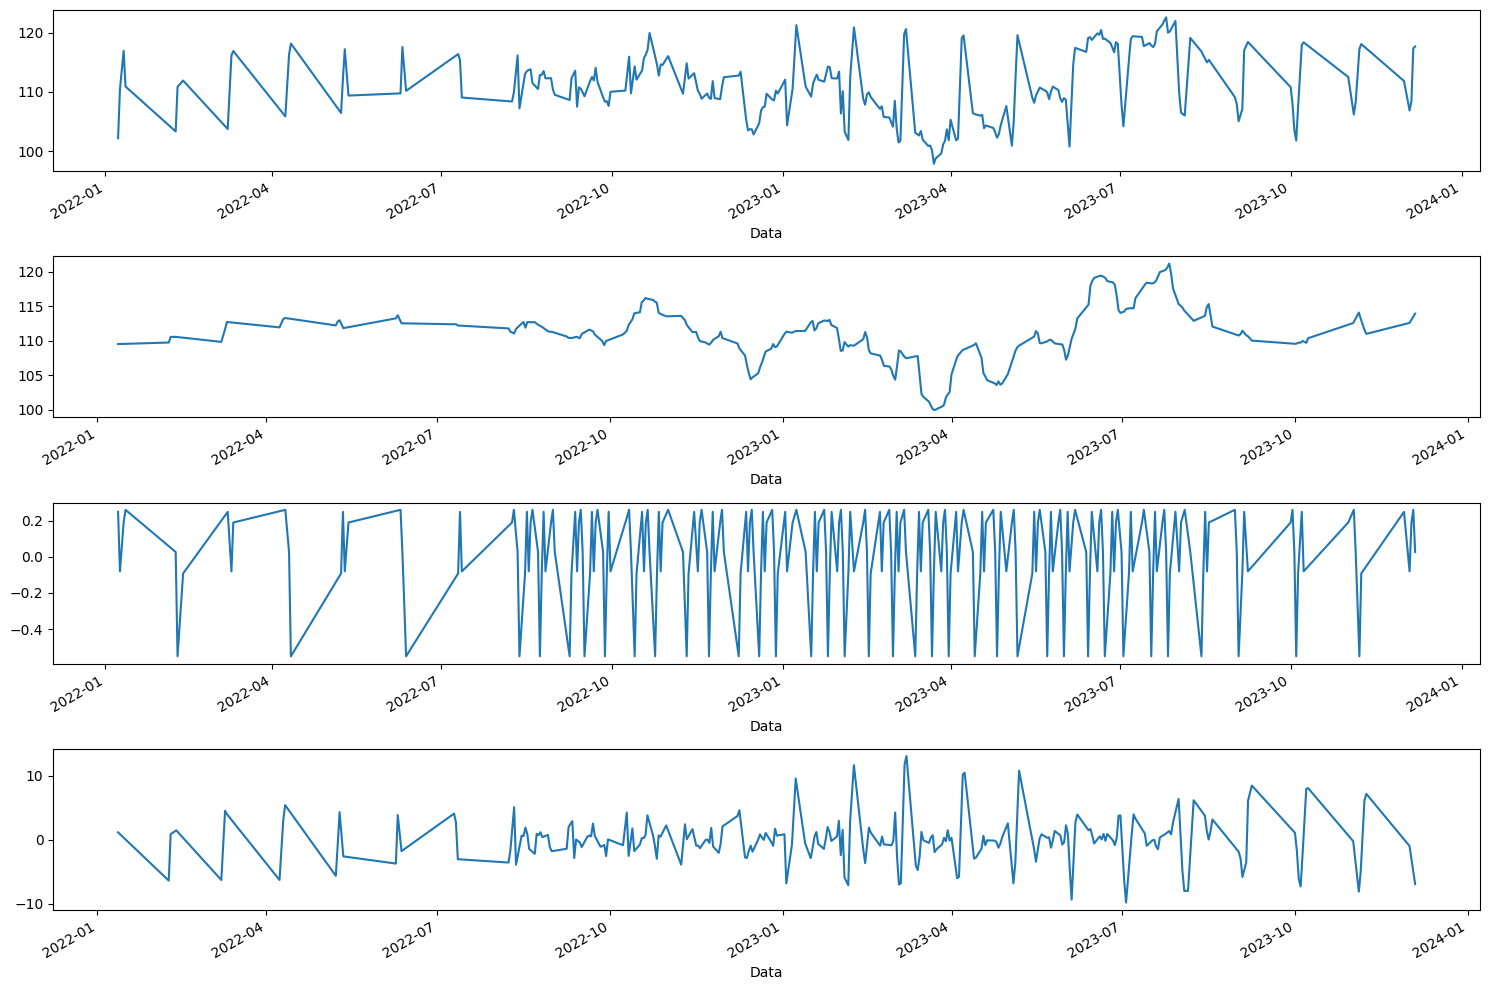

In [327]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,10))
dec_Vol.observed.plot(ax=ax1)
dec_Vol.trend.plot(ax=ax2)
dec_Vol.seasonal.plot(ax=ax3)
dec_Vol.resid.plot(ax=ax4)
plt.tight_layout()

In [328]:
dec_Max = seasonal_decompose(df['Maxima'], period=7)

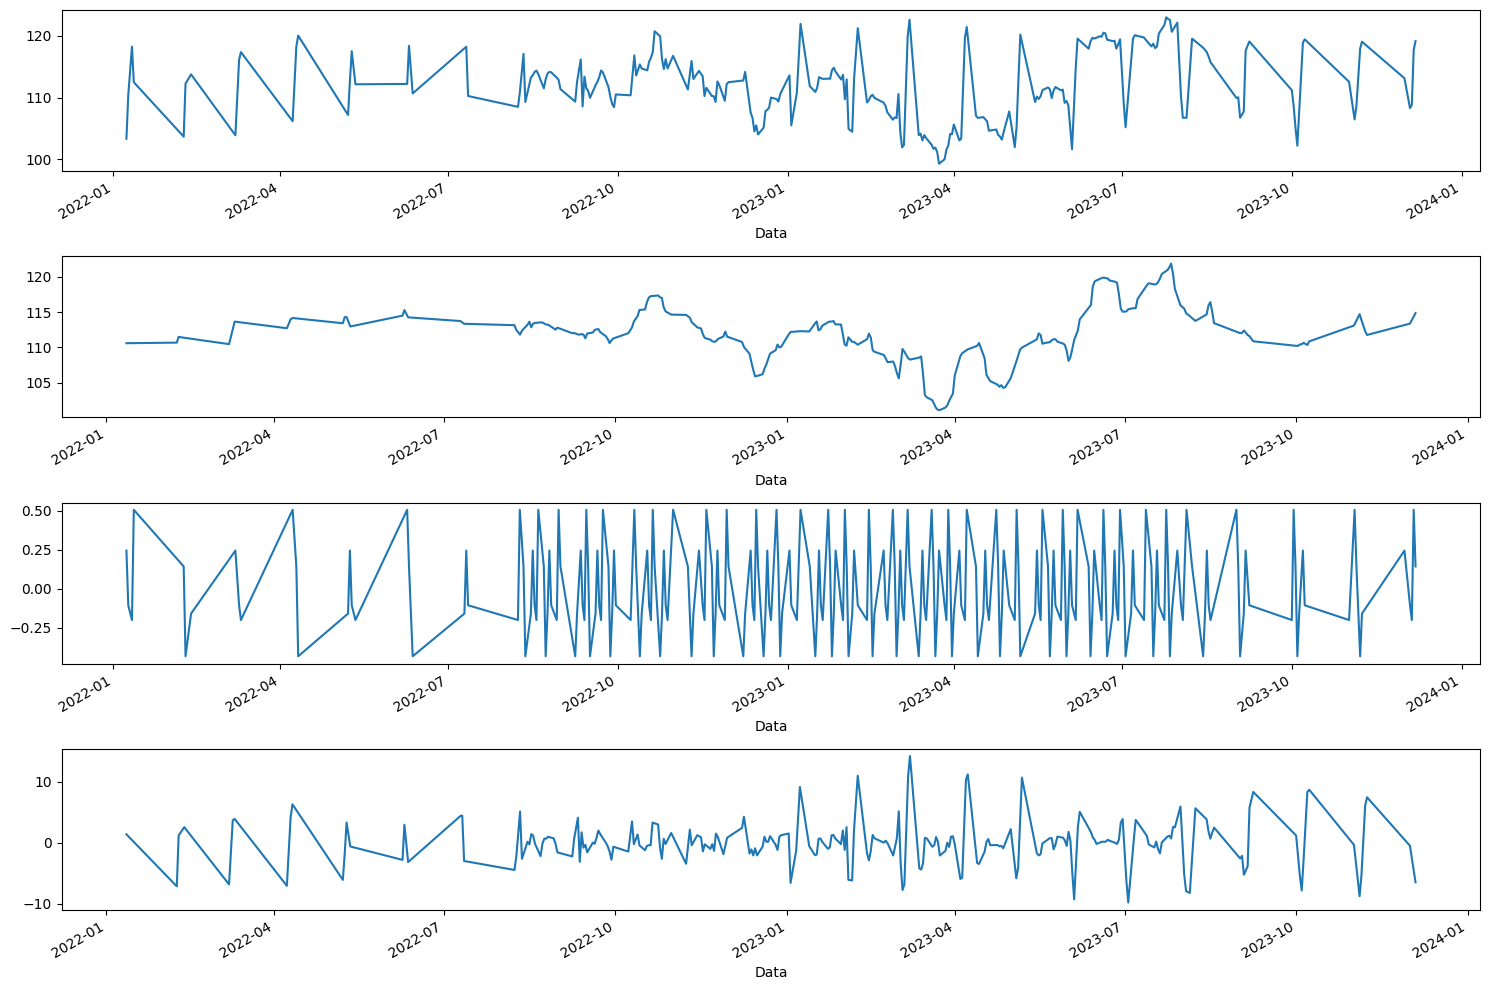

In [329]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,10))
dec_Max.observed.plot(ax=ax1)
dec_Max.trend.plot(ax=ax2)
dec_Max.seasonal.plot(ax=ax3)
dec_Max.resid.plot(ax=ax4)
plt.tight_layout()

#Intentificando Estacionária ou não Estacionária

## Teste ADF - (Augmented Dickey Fuller)

  H0 - Hipótese Nula (não Estacionária)
  
  H1 - Hipótese Alternativa (rejeição da hipótese nula)


p-value = 0.05 (5%) , então rejeitamos H0 com um nível de confiança de 95%

In [330]:
from statsmodels.tsa.stattools import adfuller

In [331]:
df_dickeyF=df.Fechamento.values

In [332]:
R_dickeyF = adfuller(df_dickeyF)

print("teste ABF")
print(f"Teste Estatistico: {R_dickeyF[0]}")
print(f"p-value: {R_dickeyF[1]}")
print(f"Valores Críticos: ")

for key, value in R_dickeyF[4].items():
  print(f"\t{key}: {value}")

teste ABF
Teste Estatistico: -3.622736381635224
p-value: 0.005340941689323622
Valores Críticos: 
	1%: -3.4558530692911504
	5%: -2.872764881778665
	10%: -2.572751643088207


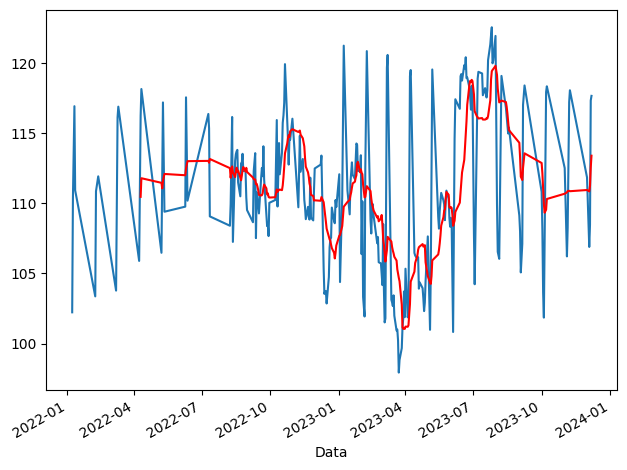

In [333]:
df_rol = df["Fechamento"].rolling(12).mean()

f, ax = plt.subplots()
df["Fechamento"].plot(ax=ax, legend=False)
df_rol.plot(ax=ax, legend=False, color="r")
plt.tight_layout()

#PROPHET - Meta --> analise de time series
https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [334]:
from prophet import Prophet

In [335]:
df_prof=pd.read_csv("/content/Dados Históricos - Ibovespa_1ano(diario).csv", sep=",")
df_prof.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,18.08.2023,115.409,114.973,115.729,114.423,"10,60M","0,37%"
1,17.08.2023,114.982,115.592,116.610,114.859,"12,75M","-0,53%"
2,16.08.2023,115.592,116.171,117.338,115.534,"18,86M","-0,50%"
3,15.08.2023,116.171,116.809,117.697,116.033,"14,64M","-0,55%"
4,14.08.2023,116.810,118.067,118.082,116.530,"11,20M","-1,06%"


In [337]:
df_prof = df_prof[['Data', 'Último']]
df_prof

,Data,Último
0,18.08.2023,115.409
1,17.08.2023,114.982
2,16.08.2023,115.592
3,15.08.2023,116.171
4,14.08.2023,116.810
...,...,...
259,05.08.2022,106.472
260,04.08.2022,105.892
261,03.08.2022,103.775
262,02.08.2022,103.362


In [338]:
df_prof.rename(columns={'Data': 'ds', "Último":"y"}, inplace=True)
df_prof

,ds,y
0,18.08.2023,115.409
1,17.08.2023,114.982
2,16.08.2023,115.592
3,15.08.2023,116.171
4,14.08.2023,116.810
...,...,...
259,05.08.2022,106.472
260,04.08.2022,105.892
261,03.08.2022,103.775
262,02.08.2022,103.362


In [339]:
df_prof1 = Prophet()
df_prof1.fit(df_prof)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpan7swvup/42e0fn0i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpan7swvup/l4_w845p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21534', 'data', 'file=/tmp/tmpan7swvup/42e0fn0i.json', 'init=/tmp/tmpan7swvup/l4_w845p.json', 'output', 'file=/tmp/tmpan7swvup/prophet_modelqak7kxyx/prophet_model-20230820015919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:59:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:59:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [340]:
future = df_prof1.make_future_dataframe(periods=365)
future.tail()

,ds
624,2024-12-02
625,2024-12-03
626,2024-12-04
627,2024-12-05
628,2024-12-06


In [341]:
forecast = df_prof1.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
624,2024-12-02,115.485128,104.264654,126.941220
625,2024-12-03,114.989215,103.187731,126.784708
626,2024-12-04,115.702289,104.914431,127.501318
627,2024-12-05,115.687319,103.880799,127.973856
628,2024-12-06,115.875005,103.971452,128.020358


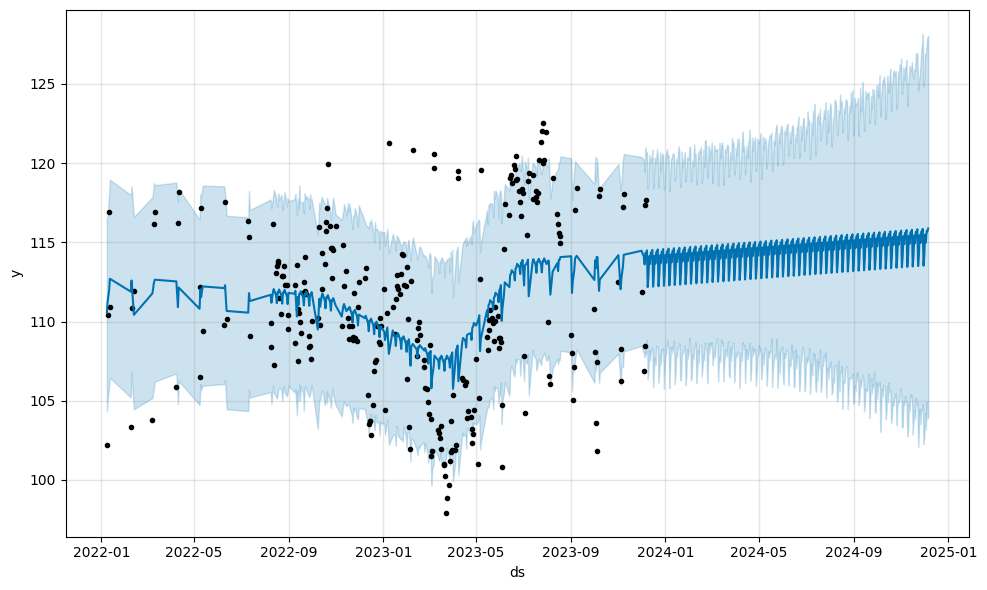

In [342]:
fig1 = df_prof1.plot(forecast)

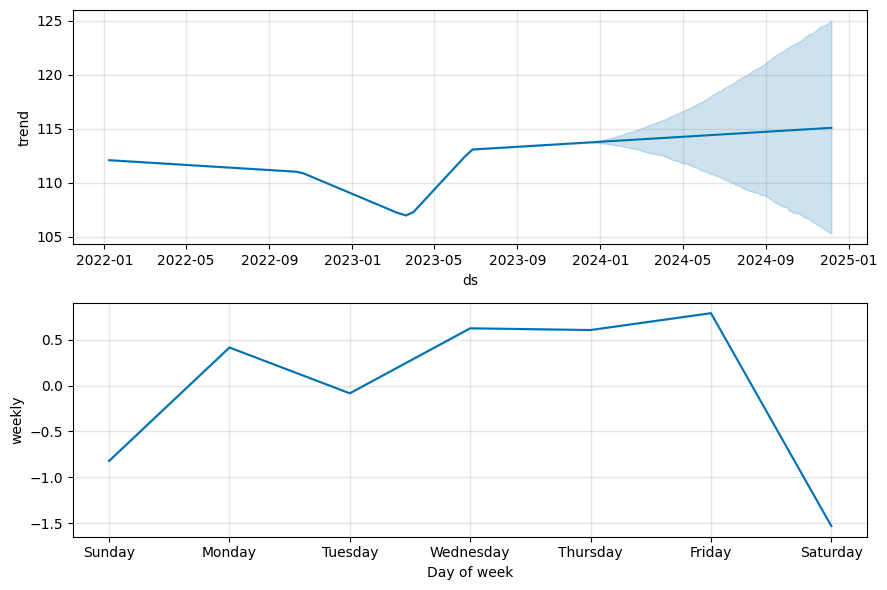

In [343]:
fig2 = df_prof1.plot_components(forecast)

In [344]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(df_prof1, forecast)

In [345]:
plot_components_plotly(df_prof1, forecast)

In [354]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd